In [1]:
wer_by_model = {
    "tiny":   {"ko": 3.2878, "en": 1.6911, "ja": 7.3700, "de": 1.1151},
    "base":   {"ko": 0.7537, "en": 0.9762, "ja": 2.5000, "de": 0.9521},
    "small":  {"ko": 0.1191, "en": 0.1973, "ja": 0.6700, "de": 0.3411},
    "medium": {"ko": 0.0187, "en": 0.4618, "ja": 1.4700, "de": 0.2882}
}

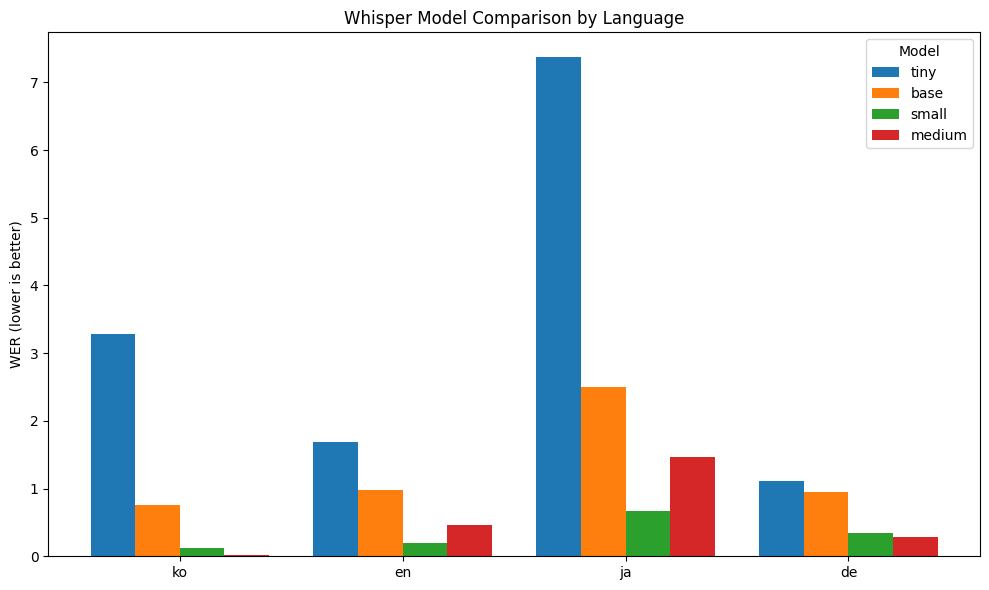

In [2]:
import matplotlib.pyplot as plt
import numpy as np

langs = ["ko", "en", "ja", "de"]
models = list(wer_by_model.keys())
bar_width = 0.2
x = np.arange(len(langs))

plt.figure(figsize=(10, 6))

for i, model in enumerate(models):
    wer_scores = [wer_by_model[model][lang] for lang in langs]
    plt.bar(x + i * bar_width, wer_scores, width=bar_width, label=model)

plt.xticks(x + bar_width * 1.5, langs)
plt.ylabel("WER (lower is better)")
plt.title("Whisper Model Comparison by Language")
plt.legend(title="Model")
plt.tight_layout()
plt.savefig("model_comparison_by_language.png")
plt.show()

In [9]:
import pandas as pd

wer_by_model = {
    "tiny":   {"ko": 3.2878, "en": 1.6911, "ja": 7.3700, "de": 1.1151},
    "base":   {"ko": 0.7537, "en": 0.9762, "ja": 2.5000, "de": 0.9521},
    "small":  {"ko": 0.1191, "en": 0.1973, "ja": 0.6700, "de": 0.3411},
    "medium": {"ko": 0.0187, "en": 0.4618, "ja": 1.4700, "de": 0.2882}
}

# 표 생성 및 소수점 3자리 반올림
df = pd.DataFrame(wer_by_model).T[["ko", "en", "ja", "de"]].round(3)

# 평균 WER 열 추가
df["average"] = df.mean(axis=1).round(3)

# 평균 기준으로 정렬
df = df.sort_values(by="average")

# 출력
from IPython.display import display
display(df)


,ko,en,ja,de,average
small,0.119,0.197,0.67,0.341,0.332
medium,0.019,0.462,1.47,0.288,0.560
base,0.754,0.976,2.50,0.952,1.296
tiny,3.288,1.691,7.37,1.115,3.366


### __각 모델별 WER이 가장 낮은 언어 & 각 언어별 WER이 가장 낮은 모델__

In [10]:
import pandas as pd
from IPython.display import display

wer_by_model = {
    "tiny":   {"ko": 3.2878, "en": 1.6911, "ja": 7.3700, "de": 1.1151},
    "base":   {"ko": 0.7537, "en": 0.9762, "ja": 2.5000, "de": 0.9521},
    "small":  {"ko": 0.1191, "en": 0.1973, "ja": 0.6700, "de": 0.3411},
    "medium": {"ko": 0.0187, "en": 0.4618, "ja": 1.4700, "de": 0.2882}
}

# WER 데이터프레임 생성
df = pd.DataFrame(wer_by_model).T[["ko", "en", "ja", "de"]]

# 각 언어별로 가장 낮은 WER 모델 순서대로 정렬
lang_best_models = {}
for lang in ["ko", "en", "ja", "de"]:
    sorted_models = df[lang].sort_values().index.tolist()
    lang_best_models[lang] = sorted_models

# 각 모델별로 가장 낮은 WER 언어 순서대로 정렬
model_best_langs = {}
for model in df.index:
    sorted_langs = df.loc[model, ["ko", "en", "ja", "de"]].sort_values().index.tolist()
    model_best_langs[model] = sorted_langs

lang_best_df = pd.DataFrame.from_dict(lang_best_models, orient='index', columns=["1st", "2nd", "3rd", "4th"])
model_best_df = pd.DataFrame.from_dict(model_best_langs, orient='index', columns=["1st", "2nd", "3rd", "4th"])

# 출력
print("📊 언어별 최적 모델 순위")
display(lang_best_df)

print("\n📊 모델별 언어 성능 순위")
display(model_best_df)

📊 언어별 최적 모델 순위


,1st,2nd,3rd,4th
ko,medium,small,base,tiny
en,small,medium,base,tiny
ja,small,medium,base,tiny
de,medium,small,base,tiny



📊 모델별 언어 성능 순위


,1st,2nd,3rd,4th
tiny,de,en,ko,ja
base,ko,de,en,ja
small,ko,en,de,ja
medium,ko,de,en,ja
